# Bill Prediction with Machine Learning.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from IPython.core.display import HTML
import datetime as dt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
addmiss = pd.read_excel(r"C:\Users\Asus\parkway\addmission_book.xlsx")  #importing data of addmission

In [3]:
bill = pd.read_excel(r"C:\Users\Asus\parkway\bill.xlsx")    #importing data of bill

In [4]:
HTML(addmiss.head().to_html())       #reading addmission data

,S.No.,DATE,TIME,UHID,IP NO.,ENCOUNTER NO.,PATIENT NAME,DOCTOR NAME,REFFERED BY NAME,DEPARTMENT NAME,AGE,SEX,WARD / ROOM,ADDRESS,CITY,STATE,COUNTRY,PIN CODE,BILLING TYPE,INSURER /EMPLOYEE NAME,MOBILE NO.,ADMISSION STATUS,LOCATION NAME
0,1.0,2019-09-01 00:00:00,25569.005139,8400172043,1091947486,841909010000,MR.RAVI RANJAN SINGH,DR.MANJUSHA AGARWAL .,GLOBAL HOSPITAL SELF,GENERAL MEDICINE,24,M,GENERAL WARD / 8,"BUXAR, BIHAR",BUXAR,BIHAR,INDIA,802103.0,MAZAGON DOCK LIMITED - MUMBAI -,NaN,9080569243,NaN,CDKD
1,2.0,43709,25569.014167,8400106189,1091947487,841909010001,MR.VASANJI SURJISHAH,DR.RAVI MOHANKA .,GLOBAL HOSPITAL SELF,HPB & LIVER TRANSPLANT,61,M,12TH FLOOR / 13,VILE PARLE,MUMBAI,MAHARASHTRA,INDIA,400056.0,SELFPAY,NaN,9892560431,NaN,CDKD
2,3.0,43709,25569.037755,8400015721,1091947488,841909010002,MR.BHUPENDRAT. SHAH,DR.AKASH SHUKLA .,GLOBAL HOSPITAL SELF,HEPATOLOGY,75,M,12TH FLOOR / 17,WADALA,NaN,MAHARASHTRA,INDIA,400031.0,MEDI ASSIST INDIA TPA PRIVATE LIMITED,NaN,9867240320,NaN,CDKD
3,6.0,43709,25569.324942,8400172051,1091947489,841909010005,BABY OFSEJAL AMIT MEHTA,DR. KAMLESH P HARIA,GLOBAL HOSPITAL SELF,PAEDIATRICS,1,F,CRADLE WARD / 2,"T J ROAD, MUMBAI",MUMBAI,MAHARASHTRA,INDIA,400015.0,SELFPAY,NaN,8369467368,NaN,CDKD
4,5.0,43709,25569.322488,8400172050,1091947489,841909010004,BABY OFSEJAL AMIT MEHTA,DR.SWATI G ALLAHBADIA .,GLOBAL HOSPITAL SELF,GYNACOLOGY,1,NaN,13TH FLOOR / 19,"T J ROAD, MUMBAI",MUMBAI,MAHARASHTRA,INDIA,400015.0,SELFPAY,,8369467368,NaN,CDKD


In [5]:
HTML(bill.head().to_html())      #reading bill data

,SL NO.,BILL NO.,BILL DATE,UHID,ENC NO.,PATIENT NAME,CONSULTANT NAME,GROSS AMOUNT,DISCOUNT,EXCLUSION DISCOUNT,NET AMOUNT,TCS AMOUNT,PACKAGE NAME,SURGEON NAME,SURGEON SPECIALITY,SURGERY DETAILS,SURGERY CHARGED FROM BILLING,ACCOUNT GROUP OF SURGERY CHARGED FROM BILLING,PAY TYPE NAME,PAY TYPE,LOS,REFFERER DOCTOR,ADDRESS,CITY,COUNTRY,LOCATION NAME
0,1,8419700849,43734,8400002150,841909230034,CHHAYA SAVLA,DR.NAGENDRA SARDESHPANDE .,149740,0,0,149740,0,GIPSA 2016 40 HYSTERECTOMY LEVEL II (PELVIC CLEARANCE) (ABD /VAG.)(LAPROSCOPIC) 42-DILATATION & CURETTAGE (D&C)SEMI PRVT-FULL,NAGENDRA S. SARDESHPANDE,GYNACOLOGY,"D & C,TOTAL LAPAROSCOPIC HYSTERECTOMY",NaN,NaN,ERICSON TPA HEALTHCARE PVT. LTD.,INSURANCE,4,CDKD GLOBAL HOSPITALS-CDKD,"304/A, NEELKANTH APTS GOKULDAS PASTA RD DADAR 400014",MUMBAI,INDIA,CDKD
1,2,8419700862,43734,8400030640,841909240019,SHIPRA SHAILESH POTLE,NaN,188534,0,0,188534,0,NaN,PRASHANTH RAO,"GI, MINIMAL INVASIVE & BARIATRIC SURGERY","LOW FISTULA IN ANO,STAPLED HAEMORRHOIDECTOMY",NaN,NaN,MEDI ASSIST INDIA TPA PRIVATE LIMITED,INSURANCE,3,GLOBAL HOSPITAL SELF,1501 DABHOLKARWADI JERBAI WADIA ROAD PAREL 400012,MUMBAI,INDIA,CDKD
2,3,8419701328,43764,8400170367,841910250000,SINDHU BHARGAVA,DR.NAGENDRA SARDESHPANDE .,89708,0,0,89708,0,NaN,NaN,NaN,"D & C,DIAGNOSTIC HYSTEROSCOPY",NaN,NaN,MDINDIA HEALTHCARE SERVICES ( TPA )PVT.LTD,INSURANCE,2,CDKD GLOBAL HOSPITALS-CDKD,B-506 DOSTI ACRES BLOSSOME BLD WADALA 400037,MUMBAI,INDIA,CDKD
3,4,8419701456,43775,8400177139,841911050006,MANOJ SHIVJI DEDHIA,DR.MAUNIL .BHUTA,120353,0,0,120353,0,NaN,NaN,INTERVENTIONAL RADIOLOGY,LASER VARICOSE VEIN,NaN,NaN,HDFC ERGO GENERAL INSURANCE,INSURANCE,2,CDKD GLOBAL HOSPITALS-CDKD,"4/32, TRANSIT CAMP, SUBHASH NAGAR CHEMBUR 400071",MUMBAI,INDIA,CDKD
4,5,8419701641,43790,8400168455,841911140006,SACHIN GANGADHAR KHULE,DR.AMIT MAYDEO .,281011,0,0,281011,0,NaN,NaN,NaN,NaN,NaN,NaN,BAJAJ ALLIANZ TPA,INSURANCE,8,CDKD GLOBAL HOSPITALS-CDKD,"302/5,NIRAJ PARK KHADAKPDA KALAYAN W 421301",THANE,INDIA,CDKD


In [6]:
addmiss.info()      #info on admission data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3439 entries, 0 to 3438
Data columns (total 23 columns):
S.No.                     3439 non-null float64
DATE                      3439 non-null object
TIME                      3439 non-null float64
UHID                      3439 non-null int64
IP NO.                    3439 non-null int64
ENCOUNTER NO.             3439 non-null int64
PATIENT NAME              3439 non-null object
DOCTOR NAME               3438 non-null object
REFFERED BY NAME          3415 non-null object
DEPARTMENT NAME           3436 non-null object
AGE                       3439 non-null int64
SEX                       3435 non-null object
WARD / ROOM               3439 non-null object
ADDRESS                   3327 non-null object
CITY                      3242 non-null object
STATE                     2963 non-null object
COUNTRY                   3439 non-null object
PIN CODE                  3410 non-null float64
BILLING TYPE              3439 non-null object
I

## admission data have float, integer and character data type. It also has null value(missing value)

In [7]:
bill.info()       #info on bill data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3440 entries, 0 to 3439
Data columns (total 26 columns):
SL NO.                                            3440 non-null int64
BILL NO.                                          3440 non-null int64
BILL DATE                                         3440 non-null object
UHID                                              3440 non-null int64
ENC NO.                                           3440 non-null int64
PATIENT NAME                                      3440 non-null object
CONSULTANT NAME                                   3439 non-null object
GROSS AMOUNT                                      3440 non-null int64
DISCOUNT                                          3440 non-null int64
EXCLUSION DISCOUNT                                3440 non-null int64
NET AMOUNT                                        3440 non-null int64
TCS AMOUNT                                        3440 non-null int64
PACKAGE NAME                                      

## bill data have float, integer and character data type. It also has null value(missing value)

In [8]:
addmiss['UHID']=addmiss['UHID'].astype(str)
addmiss['ENCOUNTER NO.']=addmiss['ENCOUNTER NO.'].astype(str)
bill['ENC NO.']=bill['ENC NO.'].astype(str)
bill['UHID']=bill['UHID'].astype(str)

## converting data type tp string to make the unique id.

In [9]:
addmiss['unique']=addmiss['UHID']+addmiss['ENCOUNTER NO.']
bill['unique']=bill['UHID']+bill['ENC NO.']

## created the unique column to merge the dataset.

In [10]:
master_frame = pd.merge(bill,addmiss,on='unique',how='inner')

## created the master frame by merging the dataset of bill and admission.

In [11]:
HTML(master_frame.head(3).to_html())      #reading the master_frame

,SL NO.,BILL NO.,BILL DATE,UHID_x,ENC NO.,PATIENT NAME_x,CONSULTANT NAME,GROSS AMOUNT,DISCOUNT,EXCLUSION DISCOUNT,NET AMOUNT,TCS AMOUNT,PACKAGE NAME,SURGEON NAME,SURGEON SPECIALITY,SURGERY DETAILS,SURGERY CHARGED FROM BILLING,ACCOUNT GROUP OF SURGERY CHARGED FROM BILLING,PAY TYPE NAME,PAY TYPE,LOS,REFFERER DOCTOR,ADDRESS_x,CITY_x,COUNTRY_x,LOCATION NAME_x,unique,S.No.,DATE,TIME,UHID_y,IP NO.,ENCOUNTER NO.,PATIENT NAME_y,DOCTOR NAME,REFFERED BY NAME,DEPARTMENT NAME,AGE,SEX,WARD / ROOM,ADDRESS_y,CITY_y,STATE,COUNTRY_y,PIN CODE,BILLING TYPE,INSURER /EMPLOYEE NAME,MOBILE NO.,ADMISSION STATUS,LOCATION NAME_y
0,1,8419700849,43734,8400002150,841909230034,CHHAYA SAVLA,DR.NAGENDRA SARDESHPANDE .,149740,0,0,149740,0,GIPSA 2016 40 HYSTERECTOMY LEVEL II (PELVIC CLEARANCE) (ABD /VAG.)(LAPROSCOPIC) 42-DILATATION & CURETTAGE (D&C)SEMI PRVT-FULL,NAGENDRA S. SARDESHPANDE,GYNACOLOGY,"D & C,TOTAL LAPAROSCOPIC HYSTERECTOMY",NaN,NaN,ERICSON TPA HEALTHCARE PVT. LTD.,INSURANCE,4,CDKD GLOBAL HOSPITALS-CDKD,"304/A, NEELKANTH APTS GOKULDAS PASTA RD DADAR 400014",MUMBAI,INDIA,CDKD,8400002150841909230034,634.0,43731,25569.850266,8400002150,23091948116,841909230034,MRS.CHHAYASAVLA,DR.NAGENDRA SARDESHPANDE .,CDKD GLOBAL,NaN,48,F,11TH FLOOR / 28,DADAR,MUMBAI,MAHARASHTRA,INDIA,400014.0,ERICSON TPA HEALTHCARE PVT. LTD.,00,9892586509,NaN,CDKD
1,2,8419700862,43734,8400030640,841909240019,SHIPRA SHAILESH POTLE,NaN,188534,0,0,188534,0,NaN,PRASHANTH RAO,"GI, MINIMAL INVASIVE & BARIATRIC SURGERY","LOW FISTULA IN ANO,STAPLED HAEMORRHOIDECTOMY",NaN,NaN,MEDI ASSIST INDIA TPA PRIVATE LIMITED,INSURANCE,3,GLOBAL HOSPITAL SELF,1501 DABHOLKARWADI JERBAI WADIA ROAD PAREL 400012,MUMBAI,INDIA,CDKD,8400030640841909240019,657.0,43732,25569.643322,8400030640,24091948139,841909240019,MRS.SHIPRA SHAILESH POTLE,NaN,GLOBAL HOSPITAL SELF,NaN,47,F,11TH FLOOR / 35,WADIA ROAD PAREL,MUMBAI,MAHARASHTRA,INDIA,400012.0,MEDI ASSIST INDIA TPA PRIVATE LIMITED,NaN,9821655509,NaN,CDKD
2,3,8419701328,43764,8400170367,841910250000,SINDHU BHARGAVA,DR.NAGENDRA SARDESHPANDE .,89708,0,0,89708,0,NaN,NaN,NaN,"D & C,DIAGNOSTIC HYSTEROSCOPY",NaN,NaN,MDINDIA HEALTHCARE SERVICES ( TPA )PVT.LTD,INSURANCE,2,CDKD GLOBAL HOSPITALS-CDKD,B-506 DOSTI ACRES BLOSSOME BLD WADALA 400037,MUMBAI,INDIA,CDKD,8400170367841910250000,1581.0,43763,25569.191817,8400170367,25101949059,841910250000,MRS.SINDHU BHARGAVA,DR.NAGENDRA SARDESHPANDE .,CDKD GLOBAL,NaN,41,F,10TH FLOOR A / 66,WADALA,MUMBAI,MAHARASHTRA,INDIA,400037.0,MDINDIA HEALTHCARE SERVICES ( TPA ),NaN,8808539098,NaN,CDKD


In [12]:
master_frame.shape    #dimension of master_frame

(3320, 50)

In [13]:
master_frame.info()      #info of master_frame

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3320 entries, 0 to 3319
Data columns (total 50 columns):
SL NO.                                            3320 non-null int64
BILL NO.                                          3320 non-null int64
BILL DATE                                         3320 non-null object
UHID_x                                            3320 non-null object
ENC NO.                                           3320 non-null object
PATIENT NAME_x                                    3320 non-null object
CONSULTANT NAME                                   3319 non-null object
GROSS AMOUNT                                      3320 non-null int64
DISCOUNT                                          3320 non-null int64
EXCLUSION DISCOUNT                                3320 non-null int64
NET AMOUNT                                        3320 non-null int64
TCS AMOUNT                                        3320 non-null int64
PACKAGE NAME                                    

## the master_frame has integer, float and character with missing value as we can see above.

In [14]:
df = pd.read_excel(r"C:\Users\Asus\parkway\or.xlsx")

## Removing the unwanted columns with missing value and importing the master_frame dataset.

In [15]:
df.head()     #reading the dataset

,PATIENT_NAME,CONSULTANT_NAME,GROSS_AMOUNT,PACKAGE_NAME,SURGEON_SPECIALITY,SURGERY_DETAILS,PAY_TYPE,PAY TYPES,LOS,unique,DEPARTMENT_NAME,AGE,SEX,WARD/ROOM,BILLING_TYPE
0,SHIPRA SHAILESH POTLE,DR.PRASHANTH RAO .,188534,NaN,"GI, MINIMAL INVASIVE & BARIATRIC SURGERY","LOW FISTULA IN ANO,STAPLED HAEMORRHOIDECTOMY",MEDI ASSIST INDIA TPA PRIVATE LIMITED,INSURANCE,3,8400030640841909240019,"GI, MINIMAL INVASIVE & BARIATRIC SURGERY",47,F,11TH FLOOR / 35,MEDI ASSIST INDIA TPA PRIVATE LIMITED
1,MANOJ SHIVJI DEDHIA,DR.MAUNIL .BHUTA,120353,NaN,INTERVENTIONAL RADIOLOGY,LASER VARICOSE VEIN,HDFC ERGO GENERAL INSURANCE,INSURANCE,2,8400177139841911050006,INTERVENTIONAL RADIOLOGY,41,M,10TH FLOOR A / 76,HDFC ERGO GENERAL INSURANCE
2,SACHIN GANGADHAR KHULE,DR.AMIT MAYDEO .,281011,NaN,NaN,NaN,BAJAJ ALLIANZ TPA,INSURANCE,8,8400168455841911140006,GASTROENTEROLOGY,43,M,11TH FLOOR / 36,BAJAJ ALLIANZ TPA
3,SHAILENDRA BHATT,DR.APARNA GOVIL .,167294,GIPSA 2016 15 CHOLECYSTECOMY (LAPROSCOPIC) - E...,BARIATRIC SURGERY,LAP CHOLECYSTECTOMY,FAMILY HEALTH PLAN TPA,INSURANCE,7,8400178648841911220008,BARIATRIC SURGERY,40,M,10TH FLOOR B / 11,FAMILY HEALTH PLAN TPA
4,SUDHIR R DUBEY,DR.PRAVEEN KULKARNI .,54336,2019 JULY - CORONARY ANGIOGRAPHY - TWINE WARD 15%,CARDIOLOGY,CORONARY ANGIOGRAPHY,SELFPAY,CASH,2,8400172123841909030010,CARDIOLOGY,47,M,9TH FLOOR MICU / 5,SELFPAY


## created dataset name df which we are going to work on.

In [16]:
df.shape     #dimension of the dataset   15columns,3303rows

(3302, 15)

In [17]:
df.info()      #info of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3302 entries, 0 to 3301
Data columns (total 15 columns):
PATIENT_NAME          3302 non-null object
CONSULTANT_NAME       3302 non-null object
GROSS_AMOUNT          3302 non-null int64
PACKAGE_NAME          516 non-null object
SURGEON_SPECIALITY    1194 non-null object
SURGERY_DETAILS       1194 non-null object
PAY_TYPE              3302 non-null object
PAY TYPES             3302 non-null object
LOS                   3302 non-null int64
unique                3302 non-null object
DEPARTMENT_NAME       3302 non-null object
AGE                   3302 non-null int64
SEX                   3302 non-null object
WARD/ROOM             3302 non-null object
BILLING_TYPE          3302 non-null object
dtypes: int64(3), object(12)
memory usage: 387.1+ KB


## dataset has int, character with missing value

In [18]:
df[['WARD','ROOM']] = df['WARD/ROOM'].str.split('/',expand=True)   #spliting ward and room making 2 different column

In [19]:
df1 = df.drop(['PATIENT_NAME','unique','PAY_TYPE','PACKAGE_NAME','SURGEON_SPECIALITY','SURGERY_DETAILS','PAY TYPES','WARD/ROOM'], axis=1)
#droping duplicate column and assiging name df1 to rest of the column

In [20]:
df1.describe()      #describing the dataset

,GROSS_AMOUNT,LOS,AGE
count,3.302000e+03,3302.000000,3302.000000
mean,1.745079e+05,5.428528,52.347365
std,3.332343e+05,4.932646,18.568675
min,1.470000e+03,1.000000,1.000000
25%,3.820025e+04,3.000000,39.000000
50%,8.155500e+04,4.000000,54.000000
75%,2.085950e+05,6.000000,66.000000
max,6.787558e+06,78.000000,100.000000


In [21]:
df1.head()     #reading the dataset df1

,CONSULTANT_NAME,GROSS_AMOUNT,LOS,DEPARTMENT_NAME,AGE,SEX,BILLING_TYPE,WARD,ROOM
0,DR.PRASHANTH RAO .,188534,3,"GI, MINIMAL INVASIVE & BARIATRIC SURGERY",47,F,MEDI ASSIST INDIA TPA PRIVATE LIMITED,11TH FLOOR,35
1,DR.MAUNIL .BHUTA,120353,2,INTERVENTIONAL RADIOLOGY,41,M,HDFC ERGO GENERAL INSURANCE,10TH FLOOR A,76
2,DR.AMIT MAYDEO .,281011,8,GASTROENTEROLOGY,43,M,BAJAJ ALLIANZ TPA,11TH FLOOR,36
3,DR.APARNA GOVIL .,167294,7,BARIATRIC SURGERY,40,M,FAMILY HEALTH PLAN TPA,10TH FLOOR B,11
4,DR.PRAVEEN KULKARNI .,54336,2,CARDIOLOGY,47,M,SELFPAY,9TH FLOOR MICU,5


## Here we can see the variable are mostly catagorical accept target variable(GROSS_AMOUNT) and AGE

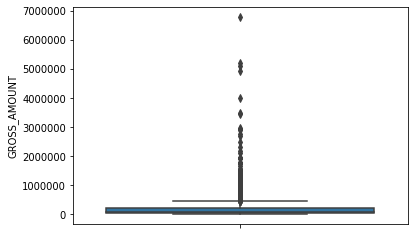

In [22]:
sns.boxplot(y='GROSS_AMOUNT',data=df1)      # data distribution

## "GROSS_AMOUNT" value distribution. we can see the most of data are within range of 1000 to 1000000 and above the range is outlier(few data point)

In [23]:
q1=df1['GROSS_AMOUNT'].quantile(0.25)
q3=df1['GROSS_AMOUNT'].quantile(0.92)
iqr=q3-q1 #Inter Quartile Range
low  = q1-1.5*iqr
high = q3+1.5*iqr
print(low)            # lowest value which we can count
print(high)           # highest value which we can count

-516815.635
963226.7250000001


In [24]:
df1.drop(df1[df1['GROSS_AMOUNT'] > high].index, inplace = True) 

In [25]:
df1.describe()

,GROSS_AMOUNT,LOS,AGE
count,3234.000000,3234.000000,3234.000000
mean,138268.974335,5.110699,52.349722
std,151212.562070,4.089108,18.600771
min,1470.000000,1.000000,1.000000
25%,37639.500000,3.000000,39.000000
50%,78538.000000,4.000000,54.000000
75%,194901.750000,6.000000,66.000000
max,951564.000000,78.000000,100.000000


In [26]:
df1.head()

,CONSULTANT_NAME,GROSS_AMOUNT,LOS,DEPARTMENT_NAME,AGE,SEX,BILLING_TYPE,WARD,ROOM
0,DR.PRASHANTH RAO .,188534,3,"GI, MINIMAL INVASIVE & BARIATRIC SURGERY",47,F,MEDI ASSIST INDIA TPA PRIVATE LIMITED,11TH FLOOR,35
1,DR.MAUNIL .BHUTA,120353,2,INTERVENTIONAL RADIOLOGY,41,M,HDFC ERGO GENERAL INSURANCE,10TH FLOOR A,76
2,DR.AMIT MAYDEO .,281011,8,GASTROENTEROLOGY,43,M,BAJAJ ALLIANZ TPA,11TH FLOOR,36
3,DR.APARNA GOVIL .,167294,7,BARIATRIC SURGERY,40,M,FAMILY HEALTH PLAN TPA,10TH FLOOR B,11
4,DR.PRAVEEN KULKARNI .,54336,2,CARDIOLOGY,47,M,SELFPAY,9TH FLOOR MICU,5


## Visualization without outlier considering till 92percentile of 'GROSS_AMOUNT' of RS.963226

In [27]:
#Non graphical analysis
df1.CONSULTANT_NAME.value_counts()

DR.AMIT MAYDEO .                361
DR.MANJUSHA AGARWAL .           216
DR.MIHIR VORA .                 170
DR.RAJ KISHORE AGARWAL .        158
DR.AKASH SHUKLA .               137
                               ... 
DR.NIMIT C SHAH .                 1
DR.KAMLESH P HARIA .              1
DR.RAHUL WAKANKAR .               1
DR.SHUBHADA S.KHANDEPARKAR .      1
DR.POOJA MADHAV .                 1
Name: CONSULTANT_NAME, Length: 153, dtype: int64

Text(0.5, 1.0, 'LOS')

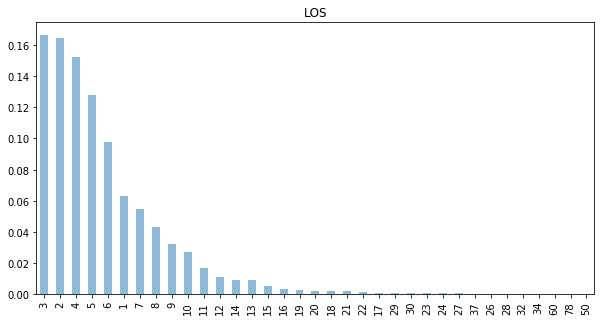

In [28]:
plt.figure(figsize=(10,5))
df1.LOS.value_counts(normalize=True).plot(kind="bar",alpha=0.5)
plt.title('LOS')

## Univariate graph(1 variable) High number of patient stay for 2-5days. In futher same kind of behaviour we can expect.

Text(0.5, 1.0, 'DEPARTMENT_NAME')

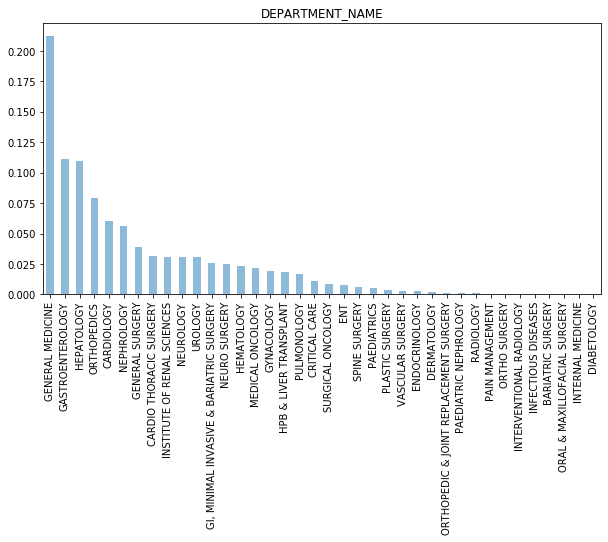

In [29]:
plt.figure(figsize=(10,5))
df1.DEPARTMENT_NAME.value_counts(normalize=True).plot(kind="bar",alpha=0.5)
plt.title('DEPARTMENT_NAME')

## Univariate graph(1 variable) Patient stayed are mostly for 'general medicine' followed by rest.

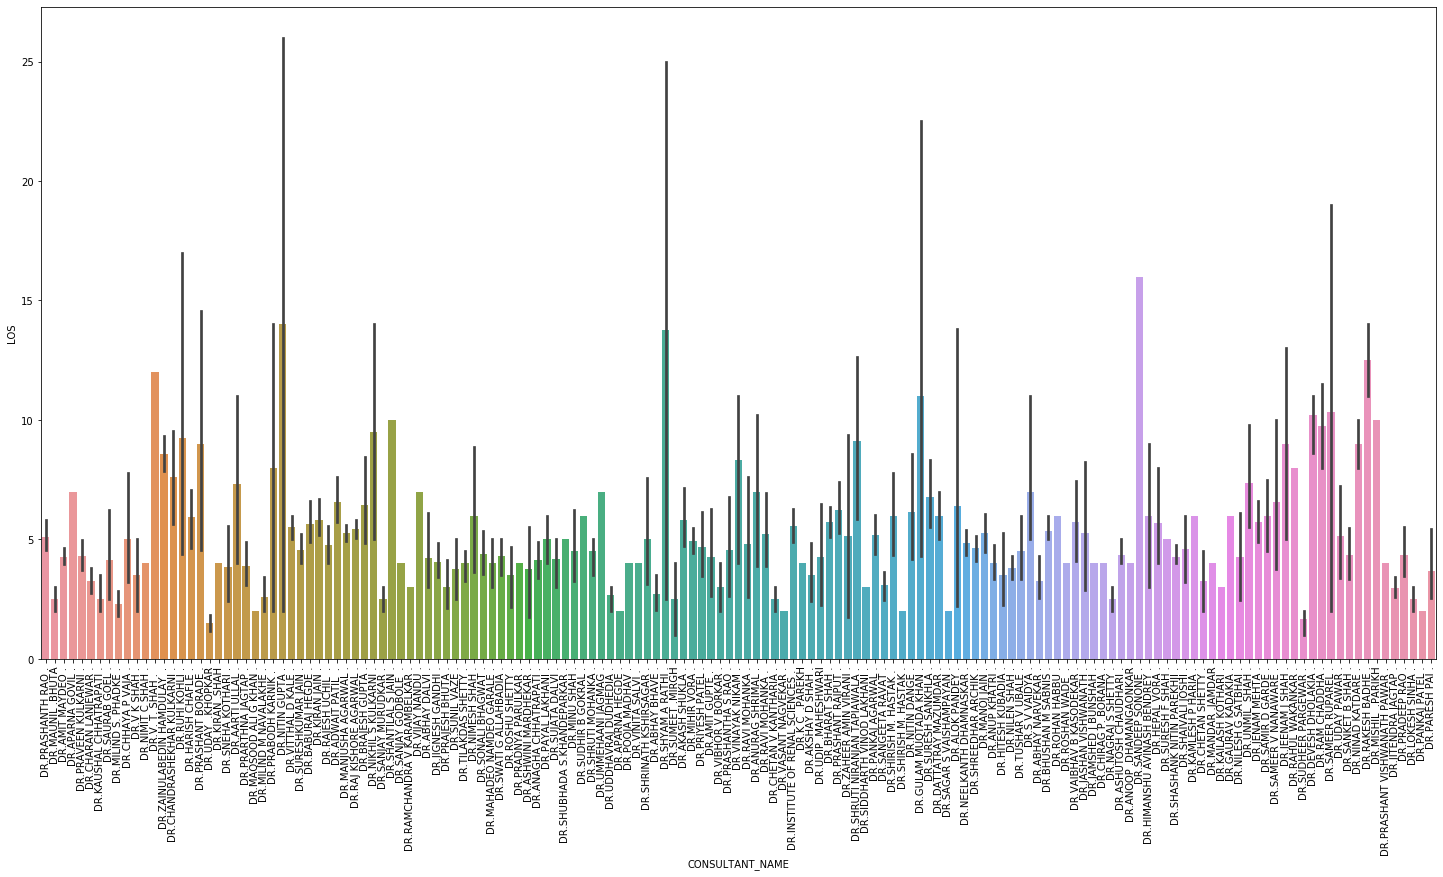

In [30]:
plt.figure(figsize = (25,12))
plt.xticks(rotation=90)
sns.barplot(x='CONSULTANT_NAME', y='LOS', data=df1)

## Bivariate graph(2 variable) Patient under Doctor Nitin gupta and Shyam rathi has the highest days of stay.

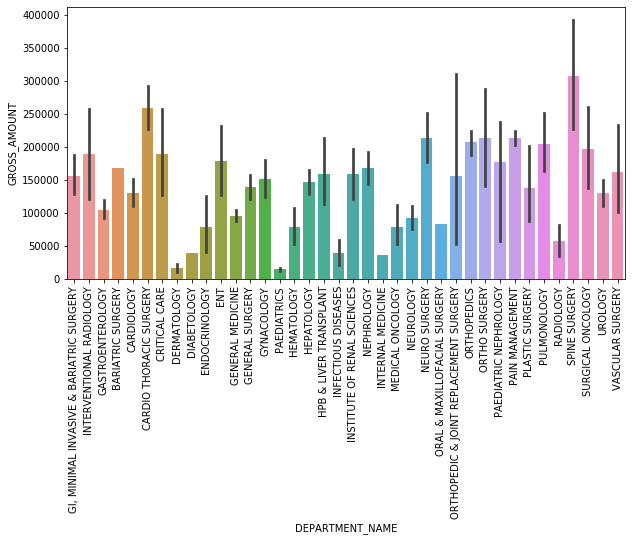

In [31]:
plt.figure(figsize = (10,5))
plt.xticks(rotation=90)
sns.barplot(x='DEPARTMENT_NAME', y='GROSS_AMOUNT', data=df1)

## Department Spine surgery and Cardio thoracic surgery generate the higest Revenue

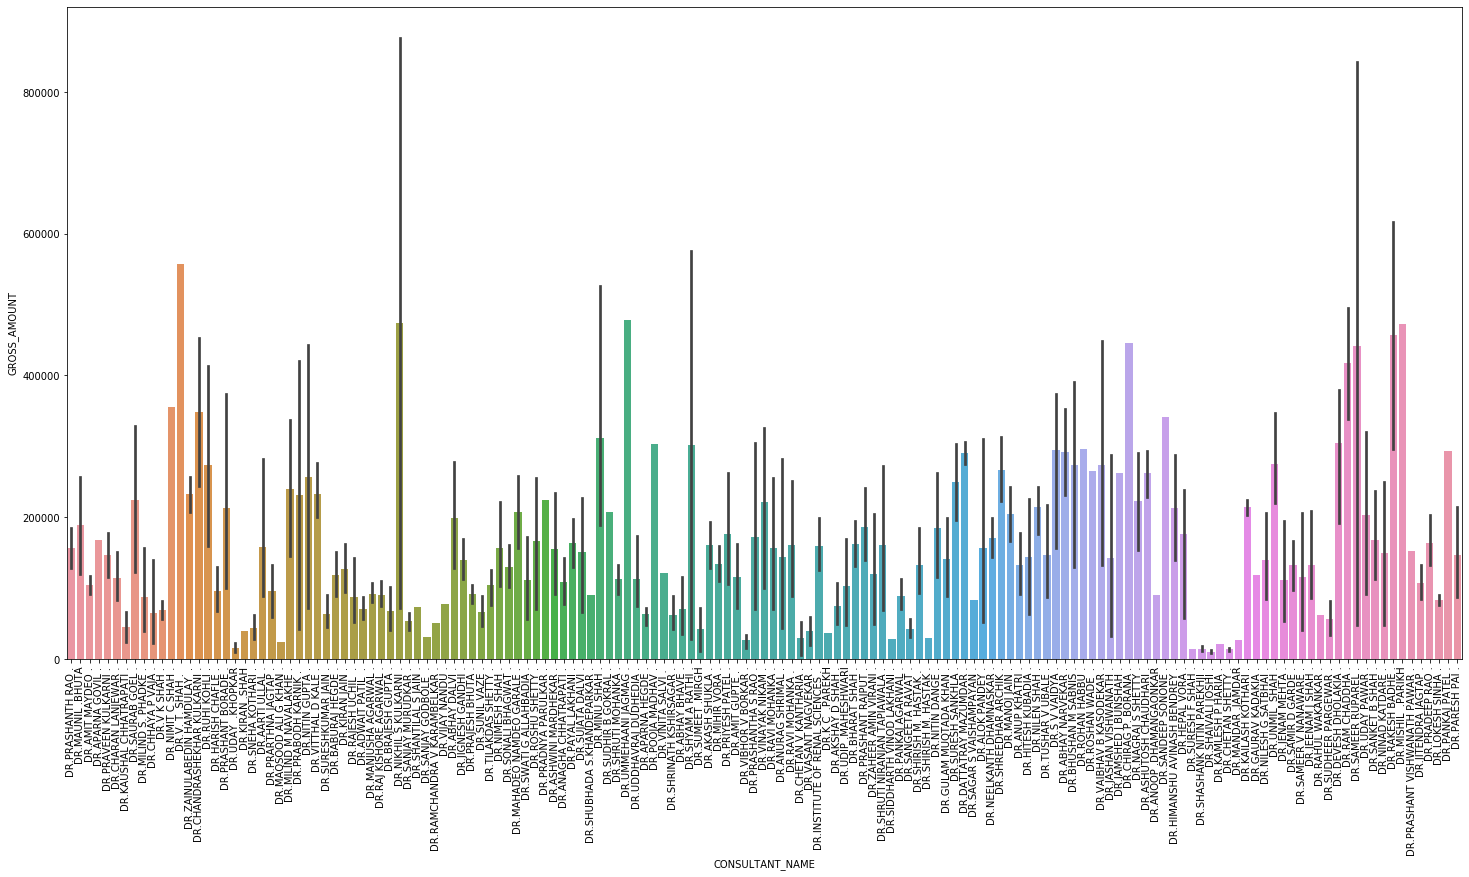

In [32]:
plt.figure(figsize = (25,12))
plt.xticks(rotation=90)
sns.barplot(x='CONSULTANT_NAME', y='GROSS_AMOUNT', data=df1)

## Doctor V.T Shah, Nikhil kulkarni, Ummehaani Jagmag, Chirag borana, Mishil parikh, Rakesh badhe generate the highest revenue.

In [33]:
df1.shape

(3234, 9)

In [34]:
#count the number of NaN values in each column
print(df1.isnull().sum())
df1.count()

CONSULTANT_NAME    0
GROSS_AMOUNT       0
LOS                0
DEPARTMENT_NAME    0
AGE                0
SEX                0
BILLING_TYPE       0
WARD               0
ROOM               0
dtype: int64


CONSULTANT_NAME    3234
GROSS_AMOUNT       3234
LOS                3234
DEPARTMENT_NAME    3234
AGE                3234
SEX                3234
BILLING_TYPE       3234
WARD               3234
ROOM               3234
dtype: int64

## machine only read number, so we have to convert catagorical variable(character) into numberic.

In [35]:
from sklearn.preprocessing import LabelEncoder
df1.CONSULTANT_NAME=(LabelEncoder().fit_transform(df1.CONSULTANT_NAME))
df1.LOS=(LabelEncoder().fit_transform(df1.LOS))
df1.DEPARTMENT_NAME=(LabelEncoder().fit_transform(df1.DEPARTMENT_NAME))
df1.SEX=(LabelEncoder().fit_transform(df1.SEX))
df1.BILLING_TYPE=(LabelEncoder().fit_transform(df1.BILLING_TYPE))
df1.WARD=(LabelEncoder().fit_transform(df1.WARD))

In [36]:
df1.head()

,CONSULTANT_NAME,GROSS_AMOUNT,LOS,DEPARTMENT_NAME,AGE,SEX,BILLING_TYPE,WARD,ROOM
0,84,188534,2,11,47,0,32,2,35
1,55,120353,1,19,41,1,17,0,76
2,9,281011,7,8,43,1,4,2,36
3,14,167294,6,0,40,1,9,1,11
4,86,54336,1,2,47,1,44,13,5


In [37]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3234 entries, 0 to 3301
Data columns (total 9 columns):
CONSULTANT_NAME    3234 non-null int32
GROSS_AMOUNT       3234 non-null int64
LOS                3234 non-null int64
DEPARTMENT_NAME    3234 non-null int32
AGE                3234 non-null int64
SEX                3234 non-null int32
BILLING_TYPE       3234 non-null int32
WARD               3234 non-null int32
ROOM               3234 non-null object
dtypes: int32(5), int64(3), object(1)
memory usage: 349.5+ KB


In [38]:
df1['ROOM'] = df1['ROOM'].astype(int)    #converting object into integer

In [39]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3234 entries, 0 to 3301
Data columns (total 9 columns):
CONSULTANT_NAME    3234 non-null int32
GROSS_AMOUNT       3234 non-null int64
LOS                3234 non-null int64
DEPARTMENT_NAME    3234 non-null int32
AGE                3234 non-null int64
SEX                3234 non-null int32
BILLING_TYPE       3234 non-null int32
WARD               3234 non-null int32
ROOM               3234 non-null int32
dtypes: int32(6), int64(3)
memory usage: 336.9 KB


In [40]:
df1.corr()

,CONSULTANT_NAME,GROSS_AMOUNT,LOS,DEPARTMENT_NAME,AGE,SEX,BILLING_TYPE,WARD,ROOM
CONSULTANT_NAME,1.000000,0.102458,0.099105,0.115683,0.000328,-0.024353,-0.038631,0.048266,-0.034632
GROSS_AMOUNT,0.102458,1.000000,0.627099,0.102156,0.146702,0.024769,-0.009352,0.045924,-0.077232
LOS,0.099105,0.627099,1.000000,-0.014886,0.048070,0.010212,-0.026355,0.080003,-0.033736
DEPARTMENT_NAME,0.115683,0.102156,-0.014886,1.000000,-0.035000,-0.007164,0.011387,-0.004182,0.065946
AGE,0.000328,0.146702,0.048070,-0.035000,1.000000,-0.031507,-0.014770,-0.029682,-0.030956
SEX,-0.024353,0.024769,0.010212,-0.007164,-0.031507,1.000000,-0.017827,0.018032,-0.030204
BILLING_TYPE,-0.038631,-0.009352,-0.026355,0.011387,-0.014770,-0.017827,1.000000,0.082567,-0.028487
WARD,0.048266,0.045924,0.080003,-0.004182,-0.029682,0.018032,0.082567,1.000000,-0.514662
ROOM,-0.034632,-0.077232,-0.033736,0.065946,-0.030956,-0.030204,-0.028487,-0.514662,1.000000


## Here we can see Gross_amount and Los is highly correlated. we can interpreted as the stay increases the Gross_Amount increases.

# Model making

In [41]:
X = df1.drop('GROSS_AMOUNT', axis = 1)
Y = df1[['GROSS_AMOUNT']]
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=100)

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [43]:
regressor = RandomForestRegressor(random_state=0,n_estimators=100,criterion='mse',max_depth=5)# n_estimators means number tree we want
regressor.fit(X_train, y_train)

C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [44]:
y_predict=regressor.predict(X_train)

In [45]:
train=pd.concat([X_train,y_train],axis=1)

In [46]:
train['Predicted']=y_predict

In [47]:
train.head()

,CONSULTANT_NAME,LOS,DEPARTMENT_NAME,AGE,SEX,BILLING_TYPE,WARD,ROOM,GROSS_AMOUNT,Predicted
2765,131,10,22,42,1,32,1,10,421168,314435.901498
733,9,2,8,55,0,56,2,2,34254,89653.146826
2310,36,6,17,22,1,42,2,30,89724,139168.154607
1229,52,3,9,31,0,35,5,10,38696,80351.684978
2412,82,8,21,64,1,44,0,64,169124,235534.000424


In [48]:
regressor.score (X_train, y_train)

0.5833022769604301

In [49]:
regressor.score (X_test, y_test)

0.5192709707608965

## We got the model accuracy of 58% while training the model and 51% accuracy while validating the model.

C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversio

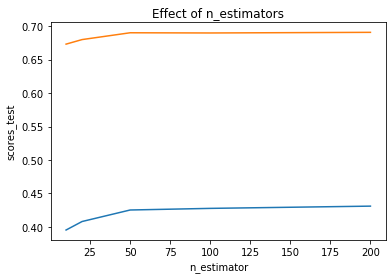

In [50]:
estimators = [10,20,50,100,200]
scores_train = []
scores_test = []
for n in estimators:
    regressor.set_params(n_estimators=n)
    regressor.fit(X_train, y_train)
    regressor.fit(X_test, y_test)
    scores_train.append(regressor.score(X_train, y_train))
    scores_test.append(regressor.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("scores_train")
plt.plot(estimators, scores_train)
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("scores_test")
plt.plot(estimators, scores_test)

C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversio

C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


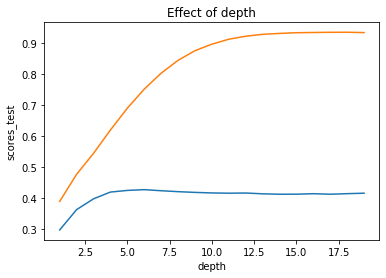

In [51]:
depth = np.arange(1,20)
scores_train = []
scores_test = []
for n in depth:
    regressor.set_params(max_depth=n,n_estimators=80 )
    regressor.fit(X_train, y_train)
    regressor.fit(X_test, y_test)
    scores_train.append(regressor.score(X_train, y_train))
    scores_test.append(regressor.score(X_test, y_test))
plt.title("Effect of depth")
plt.xlabel("depth")
plt.ylabel("scores_train")
plt.plot(depth, scores_train)
plt.title("Effect of depth")
plt.xlabel("depth")
plt.ylabel("scores_test")
plt.plot(depth, scores_test)

In [52]:
y_prediction=regressor.predict(X_test)

In [53]:
test=pd.concat([X_test,y_test],axis=1)

In [54]:
test['Predicted']=y_prediction

In [55]:
test.head()

,CONSULTANT_NAME,LOS,DEPARTMENT_NAME,AGE,SEX,BILLING_TYPE,WARD,ROOM,GROSS_AMOUNT,Predicted
1809,5,0,14,51,0,44,5,1,24000,21780.270833
1259,89,11,9,44,1,4,5,41,838792,669066.962500
560,9,2,8,22,1,44,1,4,13988,22159.362500
2309,36,3,17,81,0,54,1,2,37508,49452.802348
2856,116,4,27,58,1,38,18,3,209803,225916.441667


In [56]:
# Test
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_prediction))
print('Mean squared Error:', metrics.mean_squared_error(y_test, y_prediction))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, y_prediction)))

Mean Absolute Error: 27184.310047544815
Mean squared Error: 1734725109.4767392
Root Mean Squared Error: 41650.03132623959


In [57]:
# Train 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_predict))
print('Mean squared Error:', metrics.mean_squared_error(y_train, y_predict))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_train, y_predict)))

Mean Absolute Error: 65598.05993876595
Mean squared Error: 8981465503.044048
Root Mean Squared Error: 94770.59408405145


## Example of prediction

In [58]:
CONSULTANT_NAME = [2, 4] 
LOS = [2,4] 
DEPARTMENT_NAME = [9,8] 
AGE = [55,30]
SEX = [1,0]
BILLING_TYPE = [32,21]
WARD = [9,2]
ROOM = [20,4]


# dictionary of lists  
dict = {'CONSULTANT_NAME': CONSULTANT_NAME, 'LOS': LOS, 'DEPARTMENT_NAME': DEPARTMENT_NAME, 'AGE': AGE, 'SEX':SEX,
        'BILLING_TYPE':BILLING_TYPE, 'WARD':WARD, 'ROOM':ROOM}  
     
check = pd.DataFrame(dict)

In [59]:
check.head()

,CONSULTANT_NAME,LOS,DEPARTMENT_NAME,AGE,SEX,BILLING_TYPE,WARD,ROOM
0,2,2,9,55,1,32,9,20
1,4,4,8,30,0,21,2,4


In [60]:
patient_list=regressor.predict(check)
patient_list

array([119901.45208333, 125203.125     ])

# visilization with outlier in Target variable

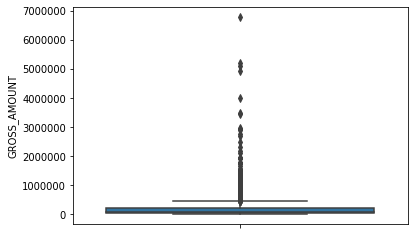

In [61]:
sns.boxplot(y='GROSS_AMOUNT',data=df)

In [62]:
Q1 = df1['GROSS_AMOUNT'].quantile(0.25)
print(Q1)
Q2 = df1['GROSS_AMOUNT'].quantile(0.50)
print(Q2)
Q3 = df1['GROSS_AMOUNT'].quantile(0.75)
print(Q3)
Q4 = df1['GROSS_AMOUNT'].quantile(1)
print(Q4)
IQR = Q3 - Q1
print(IQR)

37639.5
78538.0
194901.75
951564.0
157262.25


In [63]:
Q1 = df['GROSS_AMOUNT'].quantile(0.25)
print(Q1)
Q2 = df['GROSS_AMOUNT'].quantile(0.50)
print(Q2)
Q3 = df['GROSS_AMOUNT'].quantile(0.75)
print(Q3)
Q4 = df['GROSS_AMOUNT'].quantile(1)
print(Q4)
IQR = Q3 - Q1
print(IQR)

38200.25
81555.0
208595.0
6787558.0
170394.75


In [64]:
# build on interquartile range
def tenure_lab(df) :
    
    if df['GROSS_AMOUNT'] <= 38000 :
        return "0-38000"
    elif (df['GROSS_AMOUNT'] > 38000) & (df['GROSS_AMOUNT'] <= 81000 ):
        return "38000-81000"
    elif (df['GROSS_AMOUNT'] > 81000) & (df['GROSS_AMOUNT'] <= 200000) :
        return "81000-200000"
    elif (df['GROSS_AMOUNT'] > 200000) & (df['GROSS_AMOUNT'] <= 500000) :
        return "200000-500000"
    elif df['GROSS_AMOUNT'] > 500000 :
        return ">500000"
df['group_GROSS_AMOUNT'] = df.apply(lambda df:tenure_lab(df),axis = 1)

## Making the bag for Gross_amount into 5bag.

In [65]:
df.head()

,PATIENT_NAME,CONSULTANT_NAME,GROSS_AMOUNT,PACKAGE_NAME,SURGEON_SPECIALITY,SURGERY_DETAILS,PAY_TYPE,PAY TYPES,LOS,unique,DEPARTMENT_NAME,AGE,SEX,WARD/ROOM,BILLING_TYPE,WARD,ROOM,group_GROSS_AMOUNT
0,SHIPRA SHAILESH POTLE,DR.PRASHANTH RAO .,188534,NaN,"GI, MINIMAL INVASIVE & BARIATRIC SURGERY","LOW FISTULA IN ANO,STAPLED HAEMORRHOIDECTOMY",MEDI ASSIST INDIA TPA PRIVATE LIMITED,INSURANCE,3,8400030640841909240019,"GI, MINIMAL INVASIVE & BARIATRIC SURGERY",47,F,11TH FLOOR / 35,MEDI ASSIST INDIA TPA PRIVATE LIMITED,11TH FLOOR,35,81000-200000
1,MANOJ SHIVJI DEDHIA,DR.MAUNIL .BHUTA,120353,NaN,INTERVENTIONAL RADIOLOGY,LASER VARICOSE VEIN,HDFC ERGO GENERAL INSURANCE,INSURANCE,2,8400177139841911050006,INTERVENTIONAL RADIOLOGY,41,M,10TH FLOOR A / 76,HDFC ERGO GENERAL INSURANCE,10TH FLOOR A,76,81000-200000
2,SACHIN GANGADHAR KHULE,DR.AMIT MAYDEO .,281011,NaN,NaN,NaN,BAJAJ ALLIANZ TPA,INSURANCE,8,8400168455841911140006,GASTROENTEROLOGY,43,M,11TH FLOOR / 36,BAJAJ ALLIANZ TPA,11TH FLOOR,36,200000-500000
3,SHAILENDRA BHATT,DR.APARNA GOVIL .,167294,GIPSA 2016 15 CHOLECYSTECOMY (LAPROSCOPIC) - E...,BARIATRIC SURGERY,LAP CHOLECYSTECTOMY,FAMILY HEALTH PLAN TPA,INSURANCE,7,8400178648841911220008,BARIATRIC SURGERY,40,M,10TH FLOOR B / 11,FAMILY HEALTH PLAN TPA,10TH FLOOR B,11,81000-200000
4,SUDHIR R DUBEY,DR.PRAVEEN KULKARNI .,54336,2019 JULY - CORONARY ANGIOGRAPHY - TWINE WARD 15%,CARDIOLOGY,CORONARY ANGIOGRAPHY,SELFPAY,CASH,2,8400172123841909030010,CARDIOLOGY,47,M,9TH FLOOR MICU / 5,SELFPAY,9TH FLOOR MICU,5,38000-81000


In [66]:
df['group_GROSS_AMOUNT'].nunique()

5

In [67]:
df['group_GROSS_AMOUNT'].value_counts()

38000-81000      821
0-38000          820
81000-200000     807
200000-500000    662
>500000          192
Name: group_GROSS_AMOUNT, dtype: int64

In [68]:
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import matplotlib.pyplot as plt
import seaborn as sns

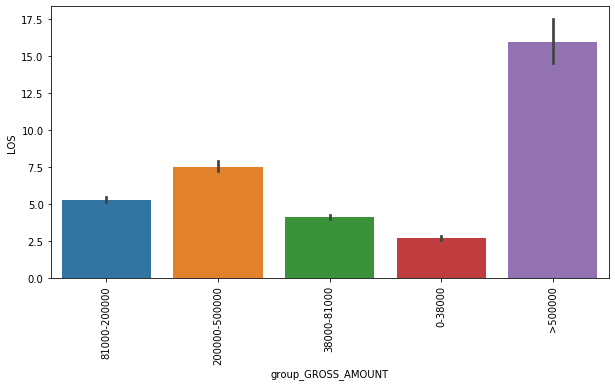

In [69]:
plt.figure(figsize = (10,5))
plt.xticks(rotation=90)
sns.barplot(x='group_GROSS_AMOUNT', y='LOS', data=df)

## Bivariate graph(2 variable) 
* Here we see that patient with bill more than RS.500000 have stay of more than 15days
* patient with bill range RS.200000-RS.500000 have stay of 8days
* patient with bill till RS.38000 have stay of 3dyas
* patient with bill range of RS.81000-RS.200000 have stay for 4-5days
* patient with bill range of RS.200000-RS.500000 have stay for 7-8days.

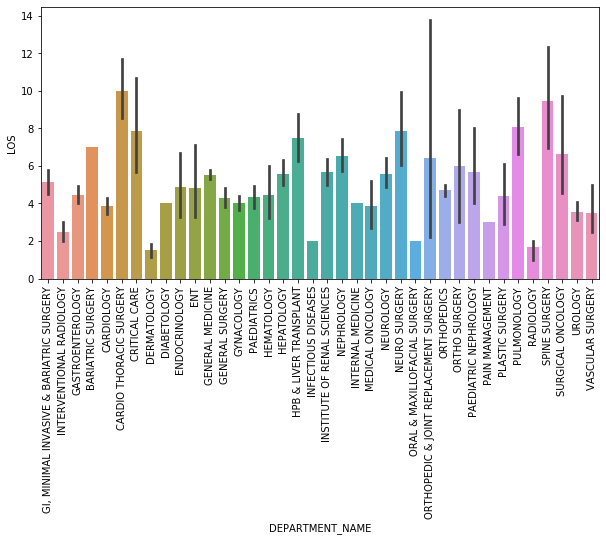

In [70]:
plt.figure(figsize = (10,5))
plt.xticks(rotation=90)
sns.barplot(x='DEPARTMENT_NAME', y='LOS', data=df)

## Average stay in the following department
* (GI, MINIMAL INVASIVE & BARIATRIC SURGERY) is 5days, 
* (INTERVENTIONAL RADIOLOGY) is 3days, 
* (GASTROENTEROLOGY) is 5days, 
* (BARIATRIC SURGERY) is 7days, 
* (CARDIOLOGY) is 4days, 
* (CARDIO THORACIC SURGERY) is 10days, 
* (CRITICAL CARE) is 8days, 
* (DERMATOLOGY) is 2days, 
* (DIABETOLOGY) is 4days, 
* (ENDOCRINOLOGY) is 5days, 
* (ENT) is 5days, 
* (GENERAL MEDICINE) is 6days, 
* (GENERAL SURGERY) is 5days, 
* (GYNACOLOGY) is 4days, 
* (PAEDIATRICS) is 5days, 
* (HEMATOLOGY) is 5days, 
* (HEPATOLOGY) is 6days, 
* (HPB & LIVER TRANSPLANT) is 8days, 
* (INFECTIOUS DISEASES) is 2days, 
* (INSTITUTE OF RENAL SCIENCES) is 6days, 
* (NEPHROLOGY) is 7days, 
* (INTERNAL MEDICINE) is 4days, 
* (MEDICAL ONCOLOGY) is 4days, 
* (NEUROLOGY) is 6days, 
* (NEURO SURGERY) is 8days, 
* (ORAL & MAXILLOFACIAL SURGERY) is 2days, 
* (ORTHOPEDIC & JOINT REPLACEMENT SURGERY) is 7days, 
* (ORTHOPEDICS) is 5days, 
* (ORTHO SURGERY) is 6days, 
* (PAEDIATRIC NEPHROLOGY) is 6days, 
* (PAIN MANAGEMENT) is 3days,  
* (PLASTIC SURGERY) is 5days, 
* (PULMONOLOGY) is 8days, 
* (RADIOLOGY) is 2days, 
* (SPINE SURGERY) is 10days, 
* (SURGICAL ONCOLOGY) is 7days, 
* (UROLOGY) is 4days, 
* (VASCULAR SURGERY) is 4days.

Text(0.5, 1.0, 'DEPARTMENT_NAME')

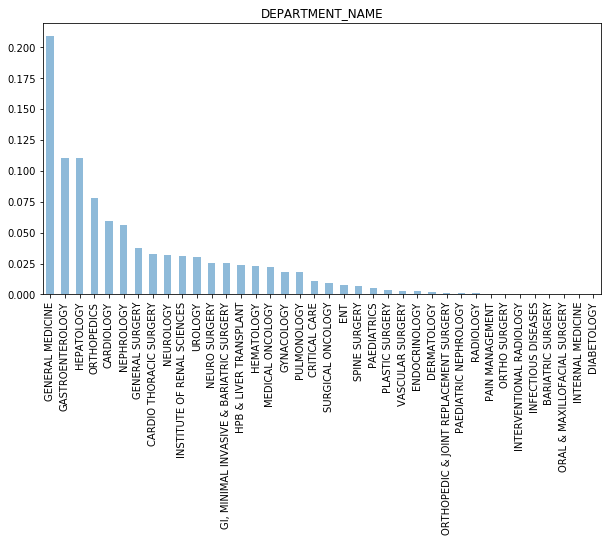

In [71]:
plt.figure(figsize=(10,5))
df.DEPARTMENT_NAME.value_counts(normalize=True).plot(kind="bar",alpha=0.5)
plt.title('DEPARTMENT_NAME')

## Univariate graph(1 variable) Patient stayed are mostly came for 'general medicine' followed by 'Gastroenterology', 'Hepatology'.

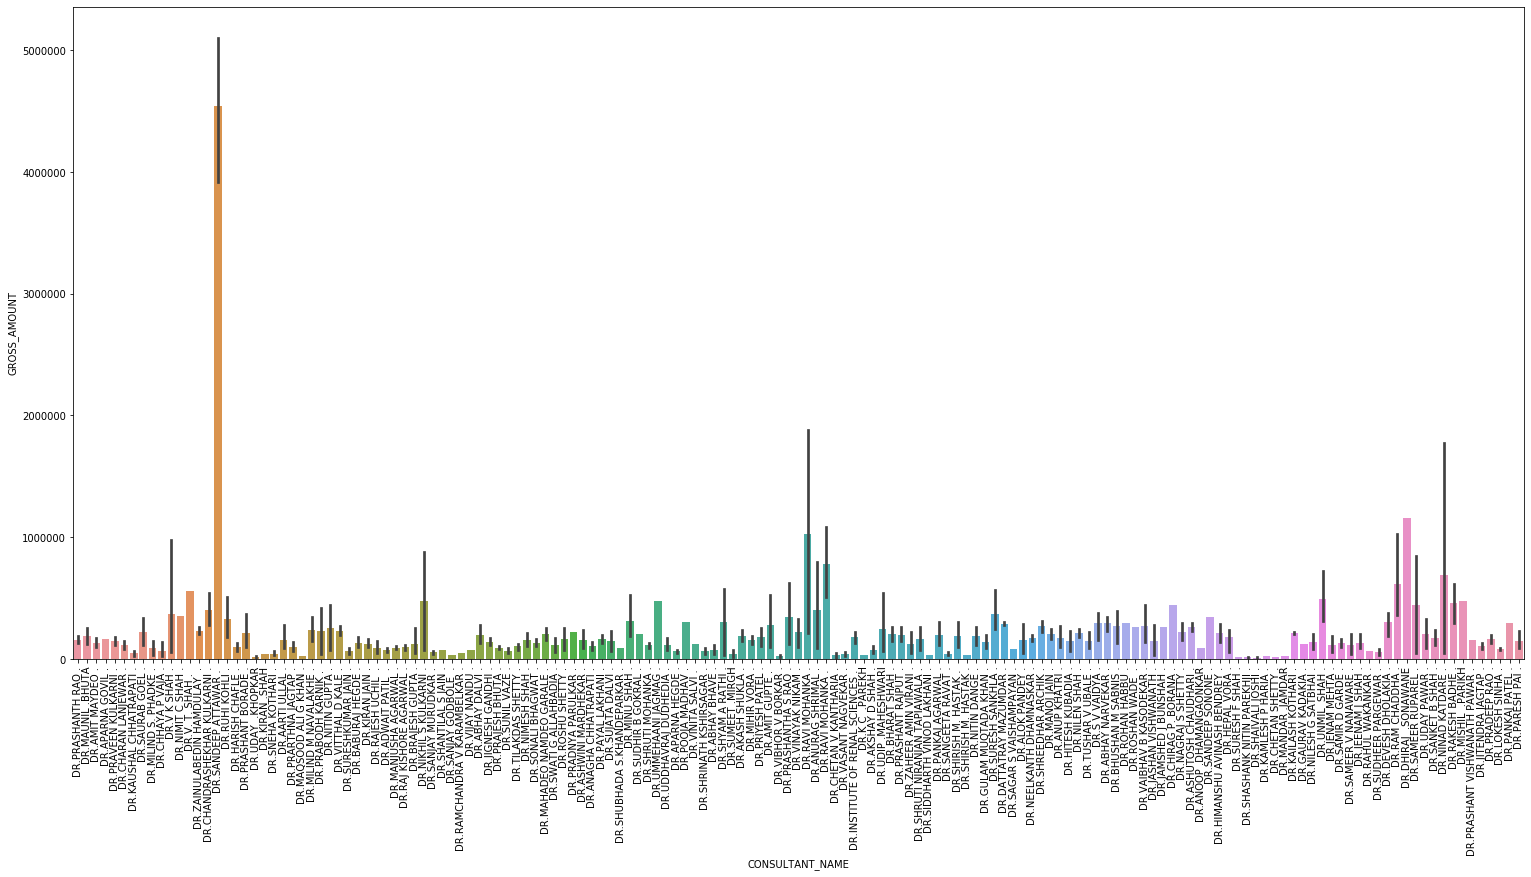

In [72]:
plt.figure(figsize = (26,12))
plt.xticks(rotation=90)
sns.barplot(x='CONSULTANT_NAME', y='GROSS_AMOUNT', data=df)

## Bivariate graph(2variable)
* Doctor SANDEEP ATTAWAR generate avg amount per patient of 45lakh from deparment CARDIO THORACIC SURGERY handle 5patient in 4months.
* Doctor RAVI MOHANKA generate avg amount per patient of 10lakh from deparment HPB & LIVER TRANSPLANT handle 45patient in 4months.
* Doctor DHIRAJ SONAWANE generate avg amount per patient of 12lakh from deparment SPINE SURGERY handle 1patient in 4months.
* Doctor AMIT GUPTE generate avg amount per patient of 9lakh from deparment HEPATOLOGY handle 13patient in 4months.

In [73]:
df.CONSULTANT_NAME.value_counts()

DR.AMIT MAYDEO .                364
DR.MANJUSHA AGARWAL .           216
DR.MIHIR VORA .                 173
DR.RAJ KISHORE AGARWAL .        159
DR.AKASH SHUKLA .               141
                               ... 
DR.NIMIT C SHAH .                 1
DR.JAMSHED J BUNSHAH .            1
DR.DHIRAJ  .SONAWANE              1
DR.SHUBHADA S.KHANDEPARKAR .      1
DR.POOJA MADHAV .                 1
Name: CONSULTANT_NAME, Length: 155, dtype: int64